Для визуализации данных был взят датасет о качестве сна и образе жизни

---



Данные были взяты на ресурсе Kaggle

В датасете представлены следующие данные:

* Индентификатор человека (person_id)
* Пол человека (gender)
* Возраст человека (age)
* Род занятий/профессия человека (occupation)
* Продолжительность сна (в часах)(sleep_duration)
* Оценка качества сна (quality_of_sleep)
* Количество минут ежедневной физической активности (physical_activity_level)
* Оценка уровня стресса (stress_level)
* Категория ИМТ человека (bmi_category)
* Артериальное давление человека (blood_pressure)
* Пульс человека (heart_rate)
* Количество шагов, пройденных за день (daily_steps)
* Наличие или отсутствие нарушения сна (sleep_disorder)

---



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go



from pylab import rcParams
rcParams['figure.figsize'] = 11, 7

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/PooFuk/Netology/master/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Для удобства работы с датафреймом переименуем наименования столбцов и приведем их к виду snake_case

In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
columns = []

for column in df.columns:
    column = column.lower().replace (' ','_')
    columns.append(column)

df.columns = columns

In [ ]:
df.shape

(374, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   person_id                374 non-null    int64  
 1   gender                   374 non-null    object 
 2   age                      374 non-null    int64  
 3   occupation               374 non-null    object 
 4   sleep_duration           374 non-null    float64
 5   quality_of_sleep         374 non-null    int64  
 6   physical_activity_level  374 non-null    int64  
 7   stress_level             374 non-null    int64  
 8   bmi_category             374 non-null    object 
 9   blood_pressure           374 non-null    object 
 10  heart_rate               374 non-null    int64  
 11  daily_steps              374 non-null    int64  
 12  sleep_disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
df.describe().style.background_gradient(cmap='Blues')

,person_id,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,heart_rate,daily_steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
pd.DataFrame(df[['gender', 'occupation', 'bmi_category', 'sleep_disorder']].apply(pd.unique)).rename(columns={0:'Unique values'})

,Unique values
gender,"[Male, Female]"
occupation,"[Software Engineer, Doctor, Sales Representati..."
bmi_category,"[Overweight, Normal, Obese, Normal Weight]"
sleep_disorder,"[None, Sleep Apnea, Insomnia]"


In [ ]:
df['bmi_category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: bmi_category, dtype: int64

Поправим данные в колонке bmi_category
* normal weight и есть показатель normal

In [ ]:
df['bmi_category'] = df['bmi_category'].replace('Normal', 'Normal Weight')

In [ ]:
df['bmi_category'].value_counts()

Normal Weight    216
Overweight       148
Obese             10
Name: bmi_category, dtype: int64



---



---

Посмотрим на распределение людей с бессонницей, апноэ и людей без нарушений сна

In [ ]:
df['sleep_disorder'].value_counts().sort_values()

Insomnia        77
Sleep Apnea     78
None           219
Name: sleep_disorder, dtype: int64

<Axes: title={'center': 'Распределение видов расстройств сна или отсутствие'}, ylabel='sleep_disorder'>

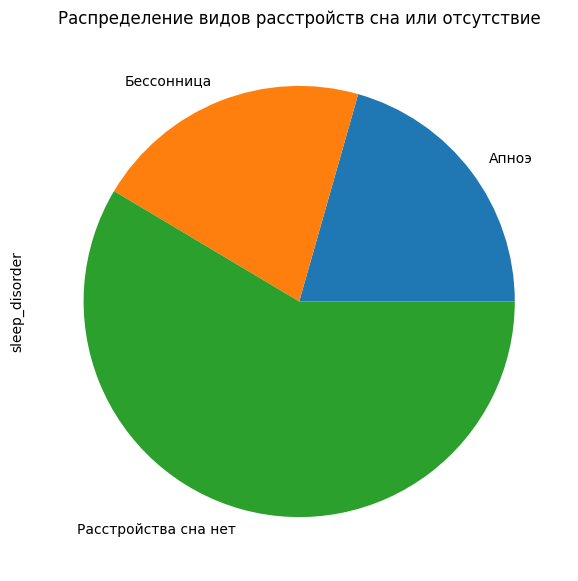

In [ ]:
df['sleep_disorder'].value_counts().sort_values().plot(kind='pie', title='Распределение видов расстройств сна или отсутствие',
                    labels = ['Апноэ', 'Бессонница', 'Расстройства сна нет'])

Исходя из диаграммы мы видим, что в выборке преобладает количество людей без растройства сна

---



Сравним распределение людей в датасете по гендерному признаку, по возрасту и ИМТ

<Axes: title={'center': 'Cоотношение мужчин и женщин в исследовании'}, xlabel='Количество людей', ylabel='пол'>

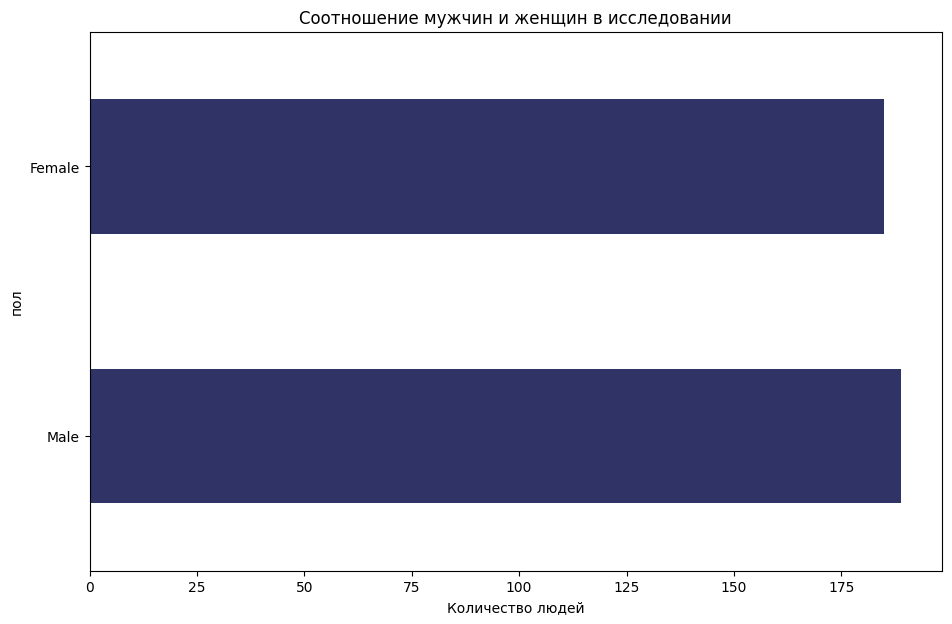

In [ ]:
df['gender'].value_counts().plot(kind='barh', title='Cоотношение мужчин и женщин в исследовании',
                                 xlabel='Количество людей',
                                 ylabel='пол',
                                 color='#2f3366')

[Text(0.5, 0, 'Возраст'),
 Text(0, 0.5, 'Количество'),
 Text(0.5, 1.0, 'Распределение по возрасту')]

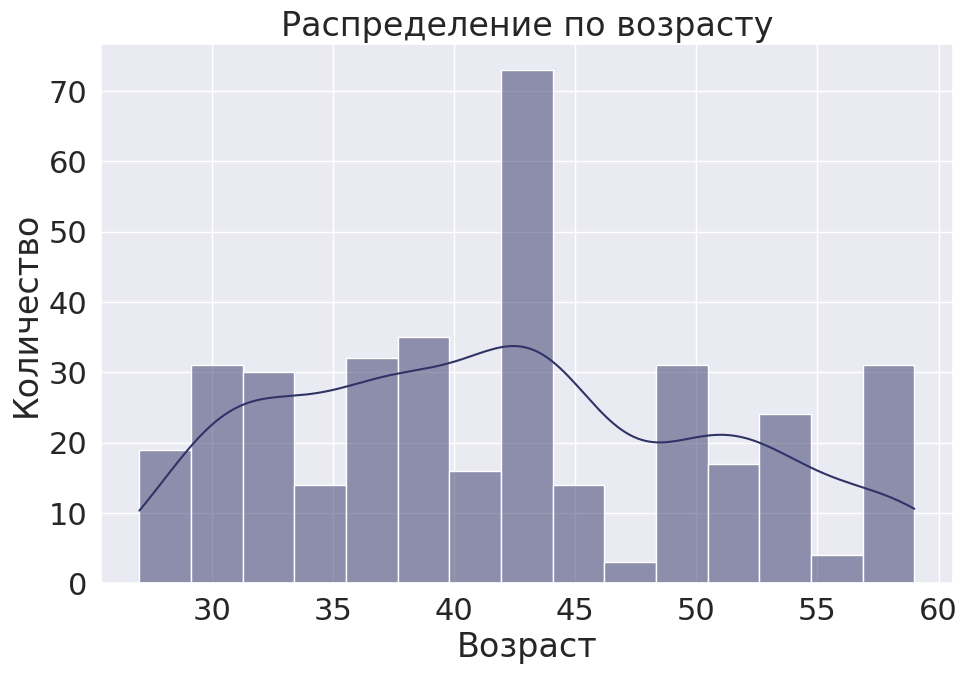

In [ ]:
fig = sns.histplot(df, x ='age',stat = 'count', bins = 15, kde = True, color = '#2f3366')\
#.set(title='Распределение по возрасту')
fig.set (xlabel='Возраст',
 ylabel='Количество',
 title='Распределение по возрасту')

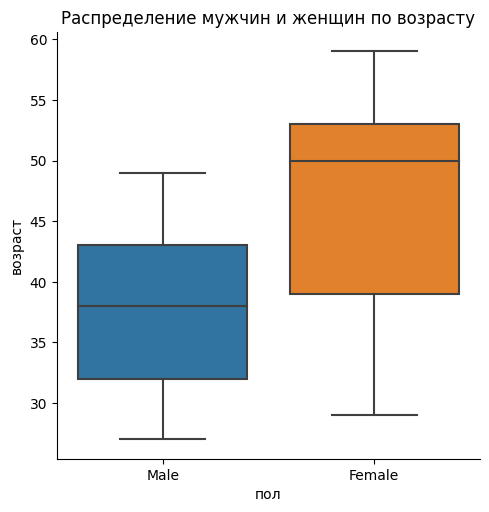

In [ ]:
fig2 = sns.catplot(df, x = 'gender', y = 'age', kind = 'box')
fig2.set (xlabel='пол',
 ylabel='возраст',
 title='Распределение мужчин и женщин по возрасту')

[Text(0.5, 0, 'ИМТ'),
 Text(0, 0.5, 'количество'),
 Text(0.5, 1.0, 'Распределение по ИМТ')]

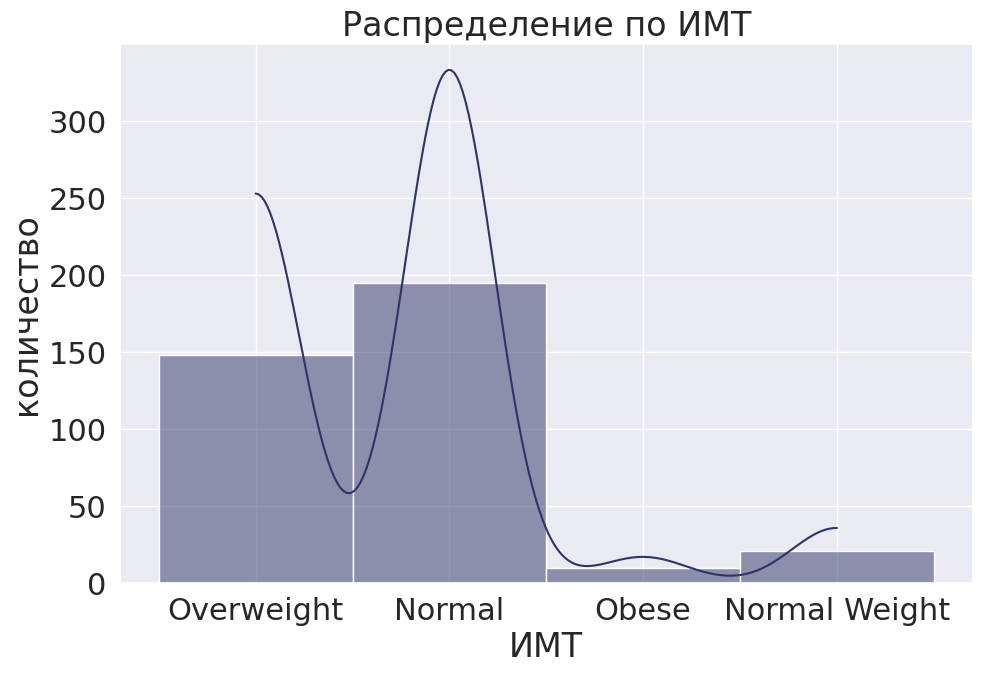

In [ ]:
fig3 = sns.histplot(df, x ='bmi_category',stat = 'count', bins = 15, kde = True, color = '#2f3366')
fig3.set (xlabel='ИМТ',
 ylabel='количество',
 title='Распределение по ИМТ')

Вывод
* преобладают данные по людям среднего возрата
* средний возраст мужчин 38 лет
* средний возраст женщин 50 лет
* мужчин в исследовании немного больше, чем женщин
* люди с весом в пределах нормы преобладают в наборе данных


---



Рассмотрим есть ли влияние уровня стресса и возраста на наличие проблем со сном

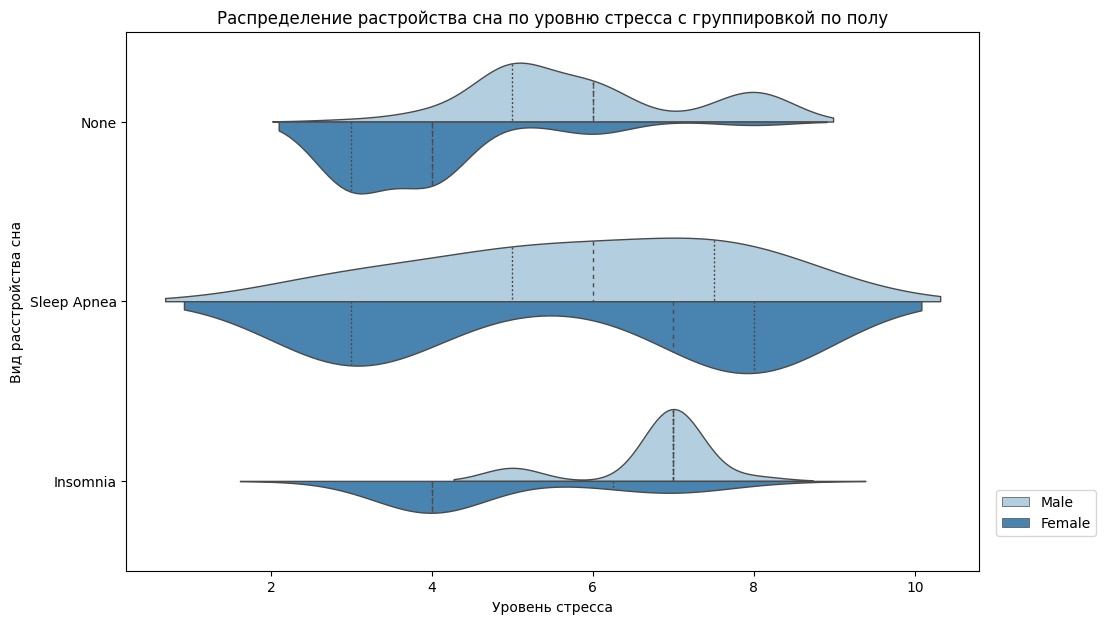

In [ ]:
fig4 = sns.violinplot(df, x='stress_level',y='sleep_disorder', hue='gender',
                     split=True,inner="quart", linewidth=1, palette="Blues")
fig4.set (xlabel='Уровень стресса',
 ylabel='Вид расстройства сна',
 title='Распределение растройства сна по уровню стресса с группировкой по полу')
plt.legend(bbox_to_anchor=( 1.02 , 0.15 ), loc='upper left', borderaxespad= 0 )

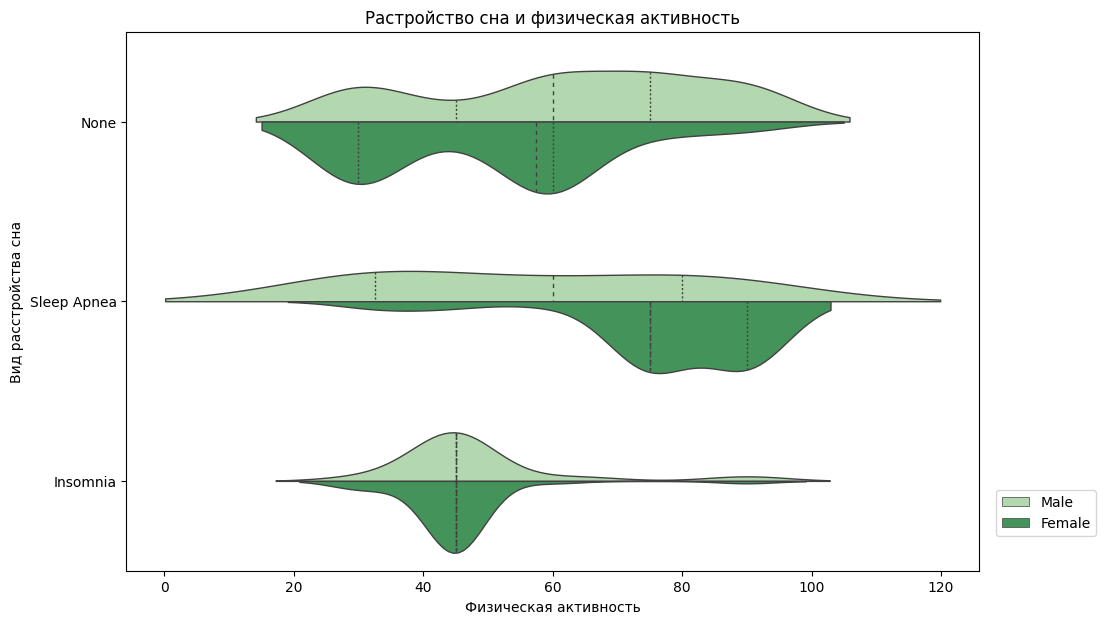

In [ ]:
fig5 = sns.violinplot(df, x='physical_activity_level',y='sleep_disorder', hue='gender',
                     split=True,inner="quart", linewidth=1, palette="Greens")
fig5.set (xlabel='Физическая активность',
 ylabel='Вид расстройства сна',
 title='Растройство сна и физическая активность')
plt.legend(bbox_to_anchor=( 1.02 , 0.15 ), loc='upper left', borderaxespad= 0 )

In [ ]:
data = []

for problem in df.sleep_disorder.unique():
    data.append(
        go.Box(y=df[df.sleep_disorder==problem].age,
               name=problem)
    )
iplot(data, show_link = False)
# Растройство сна и возраст

Глядя на графики, можно предположить:


*   Чем выше уровень стресса у женщин, тем более вероятна бессоница
*   Чем ниже уровень стресса у мужчин, тем более вероятен сон без расстройств
*   Наличие апноэ во сне не взаимосвязано со стрессом, однако присутствует взаимосвязь с возрастом (люди в возрасте 49-59 чаще страдают апноэ)
* Люди более молодого возраста не испытывают проблем со сном
* Бессоницей практически не страдают физически активные люди


---

